In [1]:
#Advanced section of matplotlib

import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
#convert the string list in the job skills column to a list
df["job_skills"] = df["job_skills"].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

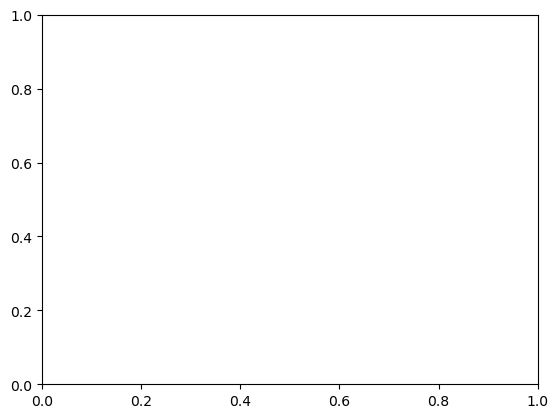

In [2]:
fig, ax = plt.subplots()

In [3]:
df["job_title_short"].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [4]:
df["job_schedule_type"].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

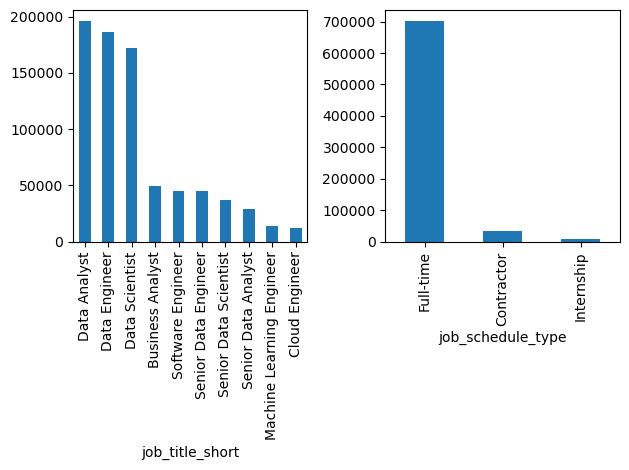

In [5]:
#sublots(rows, columns)
fig, ax = plt.subplots(1, 2)
df["job_title_short"].value_counts().plot(kind="bar", ax=ax[0])
df["job_schedule_type"].value_counts().head(3).plot(kind="bar", ax=ax[1])

#separates the figures and fixes the overlapping
fig.tight_layout()


In [6]:
df_skills = df.copy()
df_skills = df_skills.explode("job_skills")
skills_count = df_skills.groupby(["job_skills", "job_title_short"]).size()
df_skills_count = skills_count.reset_index(name="skill_count")
df_skills_count.sort_values(by="skill_count", ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [7]:
job_titles = ["Data Scientist", "Data Engineer", "Data Analyst"]

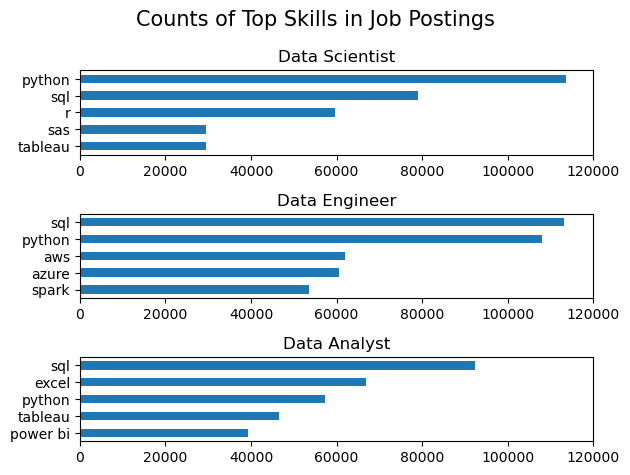

In [8]:
fig, ax = plt.subplots(3, 1)

#make a for loop to go through each job title, sort the dataframe for the job specific title, and plot that job title with it's top 5 skills
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count["job_title_short"] == job_title].head(5)
    df_plot.plot(kind="barh", x="job_skills", y="skill_count", ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel("")
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)

fig.suptitle("Counts of Top Skills in Job Postings", fontsize=15)
fig.tight_layout()

In [9]:
#Pie charts

import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
#convert the string list in the job skills column to a list
df["job_skills"] = df["job_skills"].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

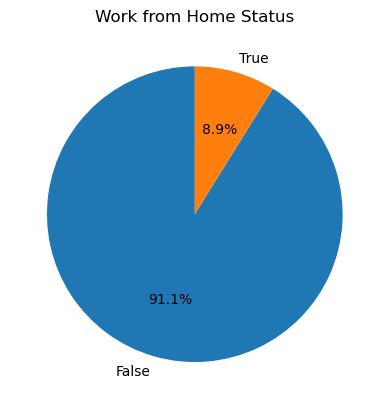

In [10]:
#making a pie chart for work from home counts, but need to add percentages to see which job title is more
#%1.1f%% is floating point number with 1 decimal point
df["job_work_from_home"].value_counts().plot(kind="pie", startangle=90, autopct="%1.1f%%")
plt.title("Work from Home Status")
plt.ylabel("")
plt.show()

In [11]:
df[["job_work_from_home", "job_no_degree_mention", "job_health_insurance"]]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


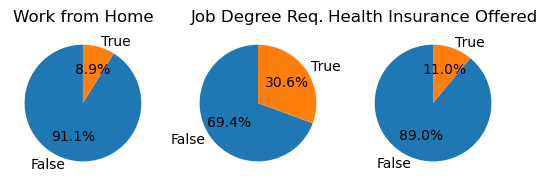

In [12]:
fig, ax = plt.subplots(1, 3)

dict_column = {
    "job_work_from_home": "Work from Home",
    "job_no_degree_mention": "Job Degree Req.",
    "job_health_insurance": "Health Insurance Offered"
}

#.items returns a list of tuples for each key-value pair, so we can get the index from enumerate with also the dataframe column and the job title for each respective column
for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle=90, autopct="%1.1f%%", labels=["False", "True"])
    ax[i].set_title(title)

plt.show()

In [13]:
#Scatter plots

import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
#convert the string list in the job skills column to a list
df["job_skills"] = df["job_skills"].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [14]:
df = df[df["job_title_short"] == "Data Analyst"]

In [15]:
df_exploded = df.explode("job_skills")

#skill count is the column name and we are using job skills column to do a count
#can make multiple columns with different agg functions using tuples inside the agg function in the groupby function
skill_stats = df_exploded.groupby("job_skills").agg(
    skill_count=("job_skills", "count"),
    median_salary=("salary_year_avg", "median")
)

skill_stats = skill_stats.sort_values(by="skill_count", ascending=False).head(15)
skill_stats.index

Index(['sql', 'excel', 'python', 'tableau', 'power bi', 'r', 'sas',
       'powerpoint', 'word', 'sap', 'azure', 'oracle', 'aws', 'sql server',
       'go'],
      dtype='object', name='job_skills')

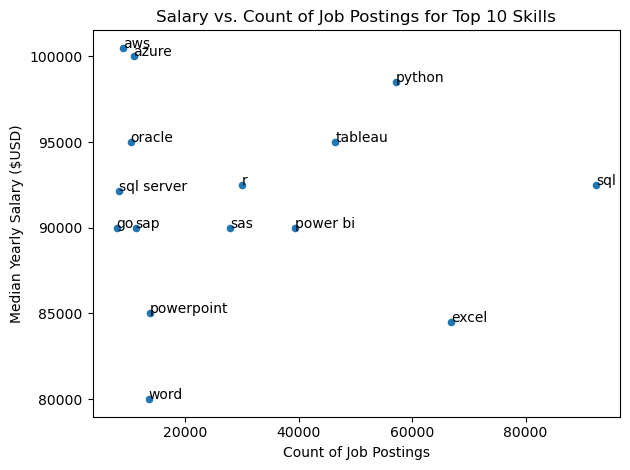

In [16]:
skill_stats.plot(kind="scatter", x="skill_count", y="median_salary")
plt.xlabel("Count of Job Postings")
plt.ylabel("Median Yearly Salary ($USD)")
plt.title("Salary vs. Count of Job Postings for Top 10 Skills")
plt.tight_layout()
for i, txt in enumerate(skill_stats.index):
    #add text to the location of the data points
    plt.text(skill_stats["skill_count"].iloc[i], skill_stats["median_salary"].iloc[i], txt)

plt.show()

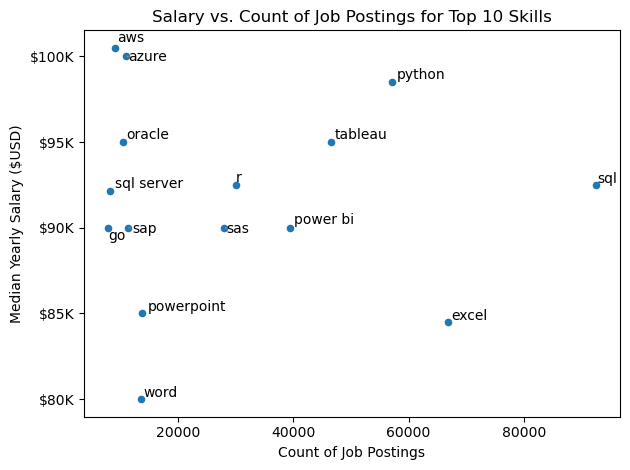

In [17]:
from adjustText import adjust_text

skill_stats.plot(kind="scatter", x="skill_count", y="median_salary")


texts=[]
for i, txt in enumerate(skill_stats.index):
    #add text to the location of the data points
    texts.append(plt.text(skill_stats["skill_count"].iloc[i], skill_stats["median_salary"].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color="gray", lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))

plt.xlabel("Count of Job Postings")
plt.ylabel("Median Yearly Salary ($USD)")
plt.title("Salary vs. Count of Job Postings for Top 10 Skills")
plt.tight_layout()
plt.show()

In [18]:
#Advanced customization

import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
#convert the string list in the job skills column to a list
df["job_skills"] = df["job_skills"].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

#Filter for Data Analyst role
df_DA = df[df["job_title_short"] == "Data Analyst"].copy()

In [19]:
df_DA["job_posted_month_no"] = df_DA["job_posted_date"].dt.month

df_DA_explode = df_DA.explode("job_skills")
df_DA_pivot = df_DA_explode.pivot_table(index="job_posted_month_no", columns="job_skills", aggfunc="size", fill_value=0)

df_DA_pivot.loc["Total"] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc["Total"].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop("Total")

df_DA_pivot.reset_index(inplace=True)
df_DA_pivot["job_posted_month"] = df_DA_pivot["job_posted_month_no"].apply(lambda x: pd.to_datetime(x, format="%m").strftime("%b"))
df_DA_pivot.set_index("job_posted_month", inplace=True)
df_DA_pivot.drop(columns="job_posted_month_no", inplace=True)


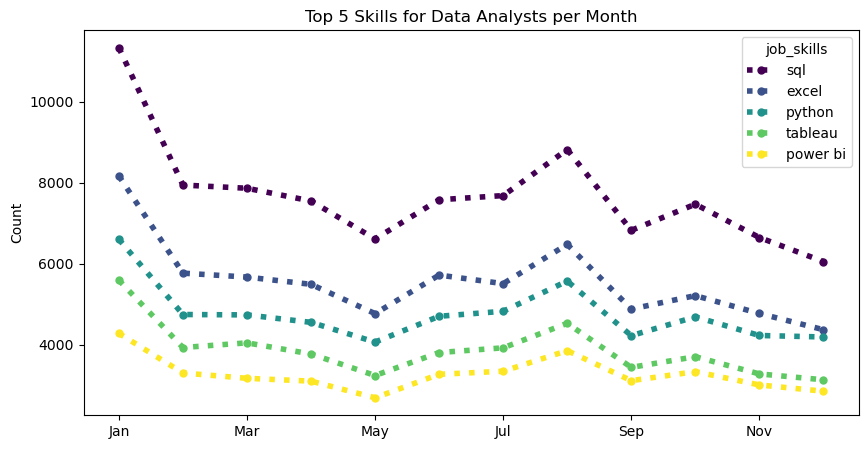

In [20]:
#go to whatever chart type you are using and go to that module to see all the parameters
df_DA_pivot.iloc[:, :5].plot(
    kind="line",
    linewidth=4,
    linestyle=":", #options: "-", "--". "-.", ":"
    colormap="viridis",
    marker="o",
    markersize=5,
    figsize=(10,5)
)
plt.title("Top 5 Skills for Data Analysts per Month")
plt.xlabel("")
plt.ylabel("Count")
plt.show()

In [21]:
#histograms

import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
#convert the string list in the job skills column to a list
df["job_skills"] = df["job_skills"].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [22]:
#filter for data analyst and job country as United States
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

Text(0.5, 0, 'Yearly Salaries')

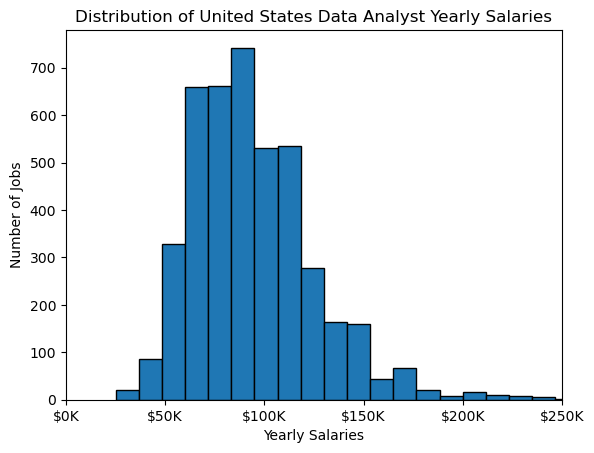

In [23]:
df_DA_US["salary_year_avg"].plot(
    kind="hist",
    bins=30,
    edgecolor="black"
)
plt.xlim(0, 250000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))

plt.title("Distribution of United States Data Analyst Yearly Salaries")
plt.ylabel("Number of Jobs")
plt.xlabel("Yearly Salaries")

In [24]:
#Box Plots

import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
#convert the string list in the job skills column to a list
df["job_skills"] = df["job_skills"].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [25]:
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()
df_DA_US = df_DA_US.dropna(subset=["salary_year_avg"])

Text(0.5, 0, 'Yearly Salaries')

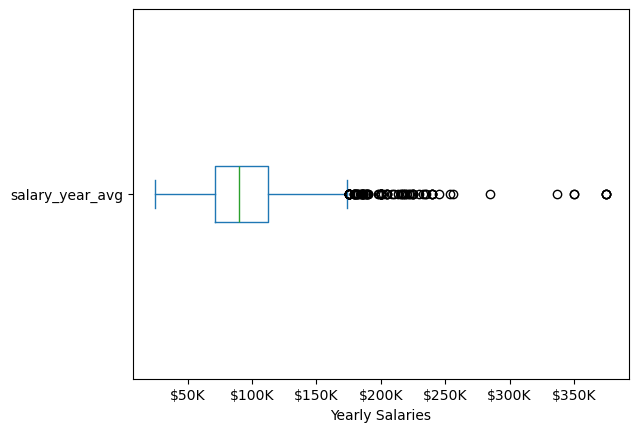

In [26]:
df_DA_US["salary_year_avg"].plot(kind="box", vert=False)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))

plt.xlabel("Yearly Salaries")

/var/folders/bj/x5sj_hrs5_9gmgmx_rqc3d100000gn/T/ipykernel_68577/2000609331.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


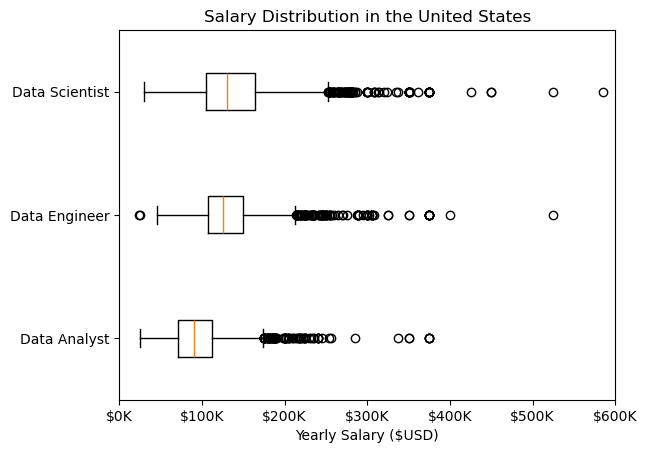

In [27]:
job_titles = ["Data Analyst", "Data Engineer", "Data Scientist"]

df_US = df[(df["job_title_short"].isin(job_titles)) & (df["job_country"] == "United States")].copy()

df_US = df_US.dropna(subset=["salary_year_avg"])

job_list = [df_US[df_US["job_title_short"] == job_title]["salary_year_avg"] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title("Salary Distribution in the United States")
plt.xlabel("Yearly Salary ($USD)")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))
plt.xlim(0, 600000)
plt.show()

In [28]:
#Exercise: Skill Pay Analysis

import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
#convert the string list in the job skills column to a list
df["job_skills"] = df["job_skills"].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [29]:
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()
df_DA_US = df_DA_US.dropna(subset=["salary_year_avg"])

In [30]:
df_DA_US = df_DA_US.explode("job_skills")

In [31]:
df_DA_US_group = df_DA_US.groupby("job_skills")["salary_year_avg"].agg(["count", "median"])

df_DA_top_pay = df_DA_US_group.sort_values(by="median", ascending=False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by="count", ascending=False).head(10).sort_values(by="median", ascending=False)

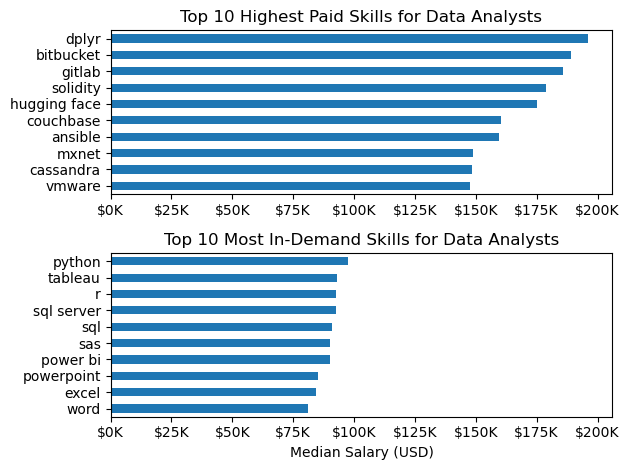

In [32]:
fig, ax = plt.subplots(2, 1)

df_DA_top_pay[::-1].plot(kind="barh", y="median", ax=ax[0], legend=False)
#ax[0].invert_yaxis() is the same thing as [::-1]
ax[0].set_title("Top 10 Highest Paid Skills for Data Analysts")
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))

df_DA_skills[::-1].plot(kind="barh", y="median", ax=ax[1], legend=False)
ax[1].set_title("Top 10 Most In-Demand Skills for Data Analysts")
ax[1].set_ylabel("")
ax[1].set_xlabel("Median Salary (USD)")
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))

fig.tight_layout()
fig.show()